<a href="https://colab.research.google.com/github/NervOUs11/Cat_or_Dog/blob/main/CatVSDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [ ]:
#install kaggle library
!pip install kaggle

In [3]:
#Configuring the path of kaggle.json file
#  !!!!! Upload kaggle.json first !!!!!

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download dataset from kaggle
!kaggle datasets download -d tongpython/cat-and-dog

In [5]:
#Extract the zip file
from zipfile import ZipFile
dataset = '/content/cat-and-dog.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()

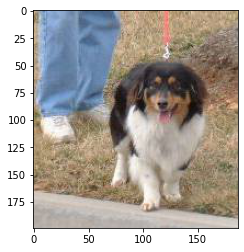

In [ ]:
import matplotlib.pyplot as plt

#Show dog image
img = plt.imread('/content/training_set/training_set/dogs/dog.2.jpg')
imgplt = plt.imshow(img)
plt.show()

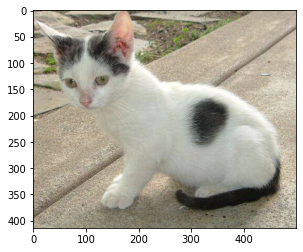

In [ ]:
#Show cat image
img = plt.imread('/content/training_set/training_set/cats/cat.3.jpg')
imgplt = plt.imshow(img)
plt.show()

In [6]:
#Prepare dataset
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'

train_data = ImageDataGenerator(
              rescale=1/255,
              rotation_range=60,
              width_shift_range=0.2,
              height_shift_range=0.2,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True,
              fill_mode='nearest')
test_data = ImageDataGenerator(rescale=1/255)


train_data = train_data.flow_from_directory(
    train_dir,
    target_size=(512,512),
    batch_size=40,
    class_mode='binary'
)
test_data = test_data.flow_from_directory(
    test_dir,
    target_size=(512,512),
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [7]:
dic = train_data.class_indices
dic

{'cats': 0, 'dogs': 1}

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

#Build model
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape = (512,512,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Show model parameter
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0

In [ ]:
#Compile model
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Train model
history = model.fit(train_data,epochs=15,validation_data=test_data)

Epoch 1/15
201/201 [==============================] - 459s 2s/step - loss: 0.7947 - accuracy: 0.5298 - val_loss: 0.6786 - val_accuracy: 0.6154
Epoch 2/15
201/201 [==============================] - 446s 2s/step - loss: 0.6701 - accuracy: 0.6075 - val_loss: 0.6521 - val_accuracy: 0.6149
Epoch 3/15
201/201 [==============================] - 445s 2s/step - loss: 0.6565 - accuracy: 0.6331 - val_loss: 0.5959 - val_accuracy: 0.6866
Epoch 4/15
201/201 [==============================] - 445s 2s/step - loss: 0.6385 - accuracy: 0.6466 - val_loss: 0.5778 - val_accuracy: 0.7009
Epoch 5/15
201/201 [==============================] - 442s 2s/step - loss: 0.6300 - accuracy: 0.6610 - val_loss: 0.5835 - val_accuracy: 0.6866
Epoch 6/15
201/201 [==============================] - 445s 2s/step - loss: 0.6095 - accuracy: 0.6778 - val_loss: 0.5700 - val_accuracy: 0.6995
Epoch 7/15
201/201 [==============================] - 443s 2s/step - loss: 0.6120 - accuracy: 0.6867 - val_loss: 0.5755 - val_accuracy: 0.7227

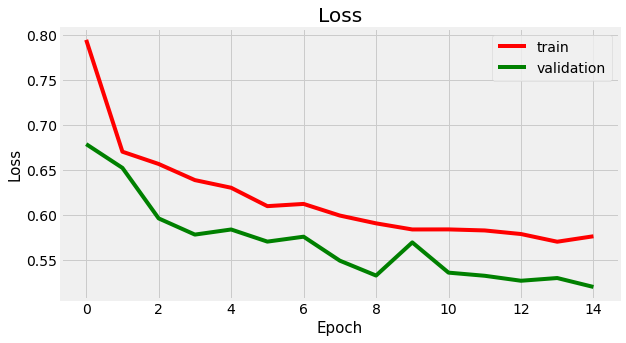

In [ ]:
#Show loss
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'], color='green',label='validation')
plt.title('Loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.legend()
plt.show()

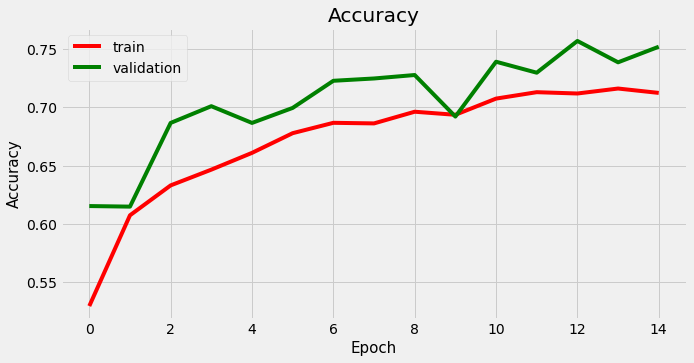

In [ ]:
#Show accuracy
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='green',label='validation')
plt.title('Accuracy')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.legend()
plt.show()

Saving cat1.jpeg to cat1 (3).jpeg
Saving cat2.jpeg to cat2 (3).jpeg
Saving cat3.jpeg to cat3 (1).jpeg
Saving dog1.jpeg to dog1 (3).jpeg
Saving dog2.jpeg to dog2 (3).jpeg
Saving dog3.jpeg to dog3 (3).jpeg
Saving dog4.jpeg to dog4 (3).jpeg
Saving dog5.jpeg to dog5.jpeg


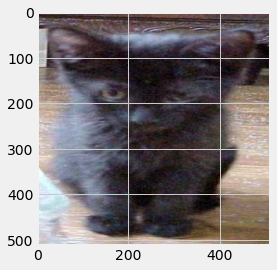

1/1 [==============================] - 0s 17ms/step
A cat
-----------------------------------



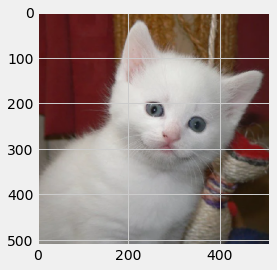

1/1 [==============================] - 0s 17ms/step
A cat
-----------------------------------



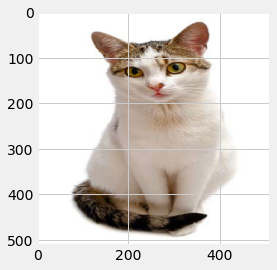

1/1 [==============================] - 0s 17ms/step
A cat
-----------------------------------



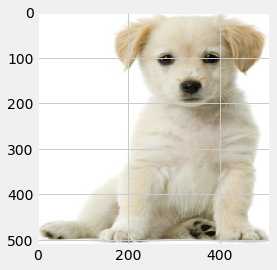

1/1 [==============================] - 0s 19ms/step
A cat
-----------------------------------



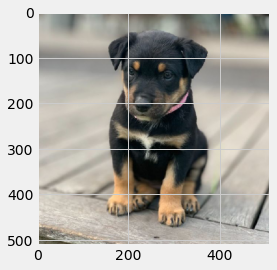

1/1 [==============================] - 0s 22ms/step
A dog
-----------------------------------



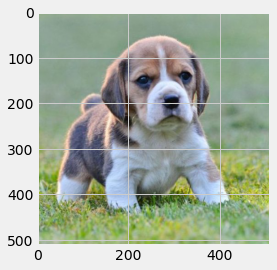

1/1 [==============================] - 0s 17ms/step
A dog
-----------------------------------



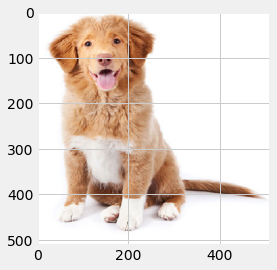

1/1 [==============================] - 0s 18ms/step
A cat
-----------------------------------



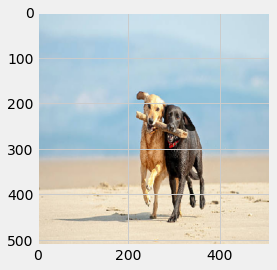

1/1 [==============================] - 0s 16ms/step
A dog
-----------------------------------



In [ ]:
#Test model (Upload new image)
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for k in uploaded.keys():

  path = '/content/' + k
  img = load_img(path, target_size=(512, 512))

  imgplt = plt.imshow(img)
  plt.show()

  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image = np.vstack([x])
  classes = model.predict(image)

  if classes > 0.5:
    print("A dog")
    print("-----------------------------------")
    print()
  else:
    print("A cat")
    print("-----------------------------------")
    print()